<a href="https://colab.research.google.com/github/ev1025/1day1commit/blob/main/%EC%BD%94%EB%93%9C%EC%8A%A4%ED%85%8C%EC%9D%B4%EC%B8%A0/%EC%BB%B4%ED%93%A8%ED%84%B0%EA%B8%B0%EC%B4%88/Section5_sprint_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NOTE 1 해시

### 해시테이블(Hash Table)

- 임의의 길이의 데이터를 고정된 길이의 배열에 저장
- key를 hash함수에 넣어 도출된 hash를 인덱스삼아 bucket에 value를 저장한다.
- 입력값의 2배인 배열을 사용하여 공간복잡도가 높다.(데이터양에 영향을 덜 받음)
- 시간복잡도는 O(1)이며 해시충돌이 발생할 경우 O(n)

#### 해시함수(Hash Function)
- Key를 **고정된 길이**의 hash로 변경해주는 역할(=Hashing)
- Key마다 고유한 인덱스값을 설정하기 위한 방법

1. Division Method
- 입력값을 테이블의 크기로 나누어 계산 (입력값%테이블크기) 
- 테이블의 크기는 소수이며 $2^n$과 먼 값을 사용해야 효과가 좋다고 함
2. Digit Folding
- 각 Key의 문자열을 아스키코드로 바꾸고 합하여 테이블주소로 사용

In [ ]:
# 해싱함수
def hashing_func(str, list_size):       # str = key(입력값), list_size = 해시배열개수
    bytes_representation = str.encode() # 입력값을 인코딩(숫자화, 문자별 byte형태로 저장됨)  
    sum = 0                             
    for byte in bytes_representation:   # 글자를 숫자로 모두 바꾼 뒤 더하기
        sum += byte

    return sum % list_size              # 인코딩 하여 더한 숫자를 배열수로 나눠서 해시를 부여

In [ ]:
# 해싱함수 테스트
hs_list = [None] * 5   # [[] for i in range(5)]

hs_list[hashing_func("key1", len(hs_list))] = "value1" # 테이블[해시함수('key', 배열수)]
hs_list[hashing_func("key2", len(hs_list))] = 'value2' 

print(hs_list)
print(hs_list[hashing_func("key1", len(hs_list))])

[None, None, None, 'value1', 'value2']
value1


### 해시충돌

- 해시테이블은 하나의 key에 하나의 hash를 부여하는 테이블이다.
- 두 가지의 key를 해시함수에 넣었을 때 같은 해시가 나오는 경우에 해시충돌이라 한다.



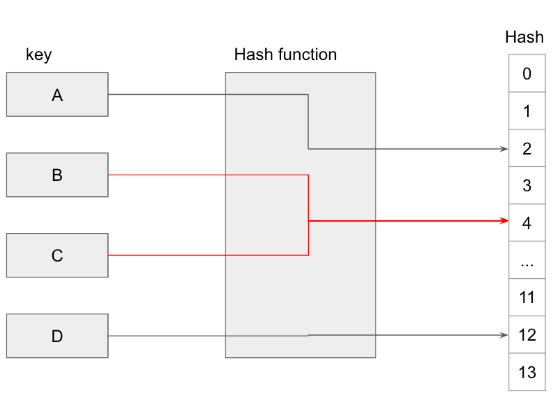

In [ ]:
# 해시테이블
hash_table = [None]*5
print(hash_table, len(hash_table))

[None, None, None, None, None] 5


In [ ]:
# 해시함수 
def hash_func(key):
    return key%len(hash_table)

print(hash_func(10))
print(hash_func(20))
print(hash_func(12))

0
0
2


In [ ]:
# 해시테이블에 값 추가
def insert_hash(key,value):
    hash = hash_func(key)
    hash_table[hash] = value

In [ ]:
# 해시충돌
insert_hash(42,'김민철') # 나머지가 2 = 해시가 2
insert_hash(32,'이진우') # 얘도 나머지가 2 = 해시가 2
insert_hash(31,'고은비')

print(hash_table) # 김민철 위에 이진우가 덮어씀

[None, '고은비', '이진우', None, None]


#### 충돌방지 1 : Chaining(체이닝)

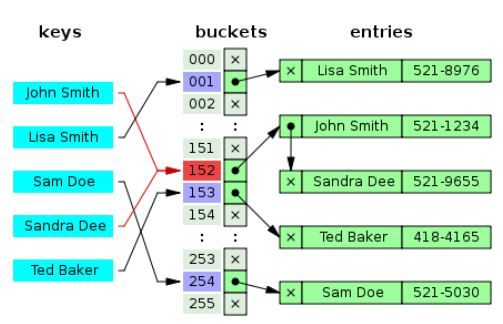

- 다른 key를 넣었을 때 동일한 해시가 도출되면 버킷에 다음 키값을 연결
- bucket에서 연결될 수 있는 entry에 제한을 두지않는 체인(연결리스트)형태로 연결

In [ ]:
# 해시테이블
chain_hash_table = [[] for _ in range(10)]  
print(chain_hash_table)

[[], [], [], [], [], [], [], [], [], []]


In [ ]:
# 해시함수
def chain_hash_func(key):
    return key%len(chain_hash_table)

In [ ]:
# 체인해시 삽입방법
def chain_insert_func(key,value):
    hash= chain_hash_func(key)
    chain_hash_table[hash].append(value)

chain_insert_func(31,'고은비')
chain_insert_func(32,'김민철')
chain_insert_func(32,'이진우')

print(chain_hash_table)                      # 전체 테이블
print(chain_hash_table[chain_hash_func(32)]) # hash값으로 찾기

[[], ['고은비'], ['김민철', '이진우'], [], [], [], [], [], [], []]
['김민철', '이진우']


In [ ]:
# 해시함수 중복비교 피하는방법
# 해싱리스트의 합이 썸벨류 값과 같은 거
def hashing_sum(hashing_list, sum_value):
    hash_table = []
    for i in range(len(hashing_list)-1):        # 4개를 서로비교 = n-1번
        for j in range(1+i, len(hashing_list)): # 비교끝난거 중복하지 않기위해 1+i
            if hashing_list[i]+hashing_list[j] == sum_value:
                hash_table.append((hashing_list[i], hashing_list[j]))
    return hash_table


hashing_sum([12,9,3,0], 12)

[(12, 0), (9, 3)]

#### 충돌방지 2 : open addressing(오픈어드레싱)


- 해시충돌이 일어났을 때 비어있는 배열을 찾아서 데이터를 저장한다.
- 체이닝과 다르게 저장공간이 고정되어있다.(하나의 bucket에 하나의 entry)
- 파이썬도 내부적으로 오픈어드레싱 방식을 활용, 빈공간이 없는 경우 오래걸림
- 따라서 로드팩터를 작게 설정하여 성능저하문제를 해결

**Load Factor**
- 해시테이블의 아이템수 / 해시테이블의 배열 수
- 로드펙터를 낮추면 해시 성능이 올라간다.
- 오픈어드레싱을 사용하면 로드팩터가 최대 1
- 체이닝을 활용하면 오픈어드레싱보다 좋은 성능을 보일 수 있다.


# NOTE 2 Graph

**그래프**

- 트리구조와 비슷하며, 노드 간에 연결될 수 있고 루프를 형성할 수 있다.
- 트리구조에 비해 자료탐색에 제한이 적다.
- 간선으로 연결된 노드는 서로 인접(adjacent)해 있다고 하며, 이웃으로 칭한다.
- 노드 = 정점 = vert
- 간선 = edge


**그래프와 트리구조 비교**

`그래프` : 노드간 관계를 표현하고 순환루프와 가중치를 가지고있다.

`트리구조` : 루트,부모,자식,서브,계층을 가진다.

### 그래프의 유형

**directed(방향성)**
- 단방향으로 이동하는 간선을 포함한 그래프
- 한쪽 방향으로 표현할 수 있다면 directed그래프가 적합하고, 마지막노드인 Leaf노드를 가진다.

**undirected(무방향성)**
- 모든 간선이 양방향성을 지닌 그래프
- 노드의 연결목적이 상호교환일 때 적합하다.
- 간선이 따로 화살표를 표현하지 않음

**Cyclic 그래프**
- 순환루프를 형성 할 수 있는 경우(같은 노드에 재방문)
- undirected 그래프는 순환그래프이다.   

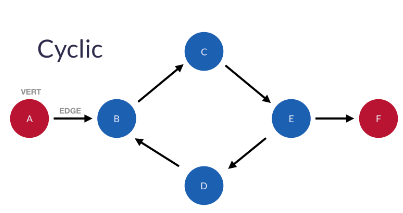

**Acyclic 그래프**
- 방문한 노드에 재방문이 불가능한 경우   

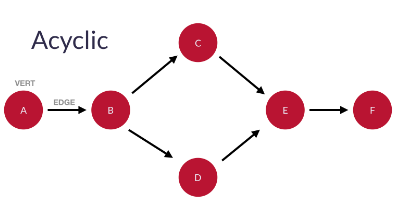

**Weighted Graphs(가중 그래프)**
- edge에 가중치가 표시된 그래프
- 가중치는 다양한 값을 나타낼 수 있음(경로간 길이나 도로 위 차량대수 등)
- 경로 경로간 가중치가 높을수록 경로이동 비용이 증가

# 순회부터 할것

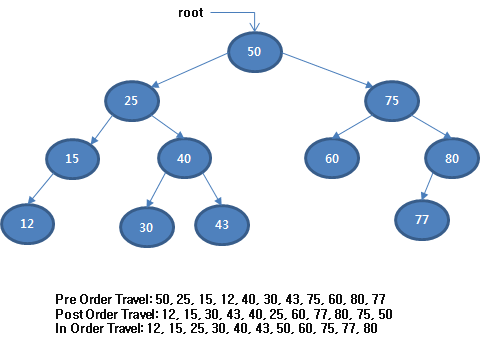

In [ ]:
n = 6
fares = [[4, 1, 10], [3, 5, 24], [5, 6, 2], [3, 1, 41], 
[5, 1, 24], [4, 6, 50], [2, 4, 66], [2, 3, 22], [1, 6, 25]]
g2 = {}
for i in range(1, n+1):
    g2[i] = {}
for start, end, cost in fares:

    g2[start][end] = cost
g2

{1: {6: 25},
 2: {4: 66, 3: 22},
 3: {5: 24, 1: 41},
 4: {1: 10, 6: 50},
 5: {6: 2, 1: 24},
 6: {}}

In [ ]:
g = [[0 if i==j else float('inf') for i in range(n)] for j in range(n)] # 자기자신에게는 0, 나머지는 무한대(inf)
for start, end, cost in fares:
		# edge는 양방향
    g[start-1][end-1] = cost
    g[end-1][start-1] = cost
g

[[0, inf, 41, 10, 24, 25],
 [inf, 0, 22, 66, inf, inf],
 [41, 22, 0, inf, 24, inf],
 [10, 66, inf, 0, inf, 50],
 [24, inf, 24, inf, 0, 2],
 [25, inf, inf, 50, 2, 0]]

In [ ]:
connection_info = {
    'A': ['B', 'C'],
    'B': ['C', 'D'],
    'C': ['D'],
    'D': ['C'],
    'E': ['F'],
    'F': ['C']}

# 목록, 시작지점, 끝지점
def search_route(connection_info, start_node, end_node, route=[]):
    route = route + [start_node] # 경로는 [경로 + 시작지]
    if start_node == end_node:   # 시작노드 = 끝노드면
        return route             # 경로는 시작노드뿐

    if not connection_info.__contains__(start_node): # 목록에 시작노드가 없으면
        return None                                  # 경유하지않음

    for node in connection_info[start_node]:         # 시작노드 경로경유지
        if node not in route:                        # 시작지가 아니면 
            result = search_route(connection_info,node, end_node, route) # 새로만들고
            return result
        else: 
            return None                           # 있으면 됐고

search_route(connection_info, 'B', 'D')


route :['B'],node: C, end : D
route :['B', 'C'],node: D, end : D


['B', 'C', 'D']

# NOTE 3 BFS DFS(그래프)

## BFS(Breadth-first-treaversal)=search

- 너비우선탐색, 루트노드부터 가로로 순회
- traversal은 순회라는 뜻으로 노드를 방문한다는 의미
- QUEUE 개념(deque)을 사용하여 선입선출하며 노드가 많아지는 경우 메모리 저장공간이 증가
- 주로 가까운 것을 찾을 때 사용하며 노드가 적은 경우 최단경로 탐색에 유용

In [ ]:
# 큐리스트
# pop(0)     queue      append(value)
#------------------------------------------
#          [1]          (start_node : 1)
#          [1,2,3,4]    (1 : {2,3,4})
# pop(1) : [2,3,4,5]    (2 : {5})
# pop(2) : [3,4,5,6,7]  (3 : {6,7})
# pop(3) : [4,5,6,7,8]  (4 : {8})
# pop(4) : [5,6,7,8,9]  (5 : {9})
# pop(5) : [6,7,8,9,10] (6 : {10})
# pop(6) : [7,8,9,10]   (7 : {})
# pop(7) : [8,9,10]     (8 : {})
# pop(8) : [9,10]       (9 : {})
# pop(9) : [10]         (10: {})

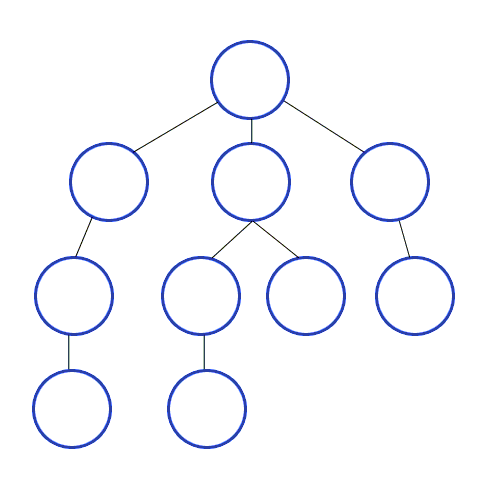

In [29]:
bfs_graph = {
    1 : [2,3,4],
    2 : [1,5,6],
    3 : [1,6],
    4 : [1],
    5 : [6,7],
    6 : [5],
    7 : [6]
}

In [56]:
# 큐 extend
def bfs_queue(start_node, visited = []):
    visited = []         # 빈 방문 리스트
    queue = [start_node] # 큐

    while queue:                 
        node = queue.pop(0)      # 선입선출이라 왼쪽 앞의 값부터 출력
        if node not in visited:  # 출력한 값이 방문한 값이 아니라면
            visited.append(node) # 방문처리하고
            queue.extend(bfs_graph[node]) # 해당 노드의 경로값은 큐에 추가(extend)

    return visited

print(bfs_queue(1))

[1, 2, 3, 4, 5, 6, 7]


In [58]:
# 큐 for 
def bfs_queue(start_node):
    visited = [start_node] # 미리 첫값을 방문리스트에 넣어주고
    queue = [start_node]

    while queue:
        node = queue.pop(0)

        for i in bfs_graph[node]: # for 노드의 경로들을
            if i not in visited:  # 방문리스트에
                visited.append(i) # 하나씩 채워준다.
                queue.append(i)   # 어차피 순차적으로 나가기 때문에..

    return visited

bfs_queue(1)

[1, 2, 3, 4, 5, 6, 7]

## DFS(Depth-First-Treaversal)=search

- 깊이우선탐색, 루트노드부터 세로로 순회
- 스택과 재귀 두 가지 개념을 사용하며 후입선출한다.
- Backtracking : 노드가 있을만한 곳을 돌아가서 살펴본다는 개념
- 깊이를 우선적으로 탐색 후 재귀적으로 아래부터 탐색하지 않은 노드 확인
- 깊이가 깊을수록 빠르게 찾는다.

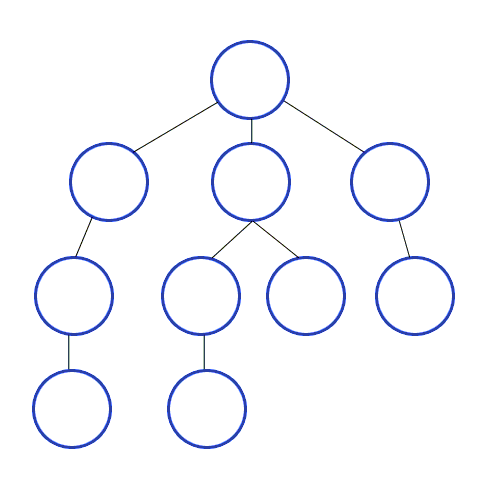

In [ ]:
dfs_graph = {
    0: [1,2,3],
    1: [4],
    2: [5],
    3: [],
    4: [6],
    5: [4],
    6: [5],
}

In [67]:
# 스택1 extend
def dfs_stk(start_node, dfs_graph, dfs_list = []): # dfs_list = 방문리스트
    stack_list = [start_node]        # 스택리스트에 초기값

    while stack_list:
        node = stack_list.pop()
        if node not in dfs_list:  # 노드가 방문리스트에 없으면
            dfs_list.append(node) # 방문처리
            stack_list.extend(dfs_graph[node][::-1]) # 역순으로 넣기 위해 reverse
    return dfs_list

result = dfs_stk(0, dfs_graph)
print(result)

[0, 1, 4, 6, 5, 2, 3]


In [71]:
# 스택2 for문
def dfs_stk(start_node, dfs_graph, dfs_list=[]):
    stack_list = [start_node]    

    while stack_list:
        node = stack_list.pop()    
        if node not in dfs_list:   # 방문처리가 안되어있으면
            dfs_list.append(node)  # 방문처리하고
            for i in dfs_graph[node][::-1]: # 노드의 경로를 역순으로(왼쪽부터 해야되는데 pop될거라서)
                stack_list.append(i)        # 스택에 거꾸로 넣어줌

    return dfs_list

dfs_stk(0, dfs_graph)

[0, 1, 4, 6, 5, 2, 3]

In [75]:
# 재귀함수
def dfs_recur(start_node, dfs_graph, dfs_list=[]):
    dfs_list.append(start_node)     # 첫노드 방문처리

    for i in dfs_graph[start_node]: # 첫노드의 경로중에서
        if i not in dfs_list:       # 방문처리가 되지 않았으면
            dfs_recur(i, dfs_graph, dfs_list) # 재귀로 가서 방문처리하고 첫 경로 방문처리
    return dfs_list
dfs_recur(0, dfs_graph)

[0, 1, 4, 6, 5, 2, 3]

# NOTE 4